In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb


In [6]:
path = 'data/test.csv'
path2 = "data/train.csv"

train = pd.read_csv(path2)

test = pd.read_csv(path)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Bismillah
from sklearn.compose import ColumnTransformer as CT, make_column_selector as mks
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer as II
from sklearn.preprocessing import OneHotEncoder as OHE, StandardScaler
from xgboost import XGBClassifier as XGBC

# Data
training = train.copy()
training.info()
testing = test.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Feature Engineering
* Explore data
* Mutual Infromation
* Making new features
* Clustering
* PCA(Unsupervised Machine Learning)
* Target Encoding(supervised Machine Learning)

In [9]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif as mic

df = train.copy()

df.drop('PassengerId', inplace=True, axis=1)

feature_num = df.shape[1]

df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


* PassengerId: Ignore
* survived: we have to treat it as if  it were categorical.
* Plcass: same as "survived"
* Name: Let's see what we can get from the title
* Sex: Male or Female
* Age: age of individual
* SibSP: Siblings or spouse
* Parch: Parent or child
* Ticket: The ticket number
* Fare: Amount paid
* cabin: The cabin number
* embarked: Where the passenger embarked from

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [11]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
import re
from sklearn.pipeline import Pipeline as Pipe


# Name Title
# using regex
compiler = re.compile(r"[a-zA-Z]+\.")

# Regular expression to find titles (e.g., Rev., Dr., etc.)
data = df.Name.apply(lambda x: str(compiler.findall(x)[0]))
data.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.'], dtype=object)

In [13]:
df['Name'] = data
df.Name.value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Countess.      1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: Name, dtype: int64

In [14]:
import plotly.graph_objs as go
from plotly.offline import iplot

# Create a bar chart
data = go.Bar(
            x=df.Name.unique(),
            y=df['Name'].value_counts()
)

# Create a layout, if you want to customize the chart
layout = go.Layout(
    title='Titles of passengers',
    xaxis=dict(title='Titles'),
    yaxis=dict(title='Frequency'),
)

# Create a figure with the data and layout
fig = go.Figure(data=data, layout=layout)

# Plot the figure
# pyo.plot(fig, filename='bar_chart.html', auto_open=False)
iplot(fig)

In [15]:
# Make a new column "Family" then work on tickets
df['Family'] = df.Parch + df.SibSp + 1

tickets = df.Ticket.apply(lambda x: "".join(re.findall(r'^[a-zA-z]', str(x))) )

tickets.replace({'': "N"}, inplace=True)

df['Ticket'] = tickets

In [16]:
# Finally the Cabin feature

# Getting the first letter
cabin = df.Cabin.apply(lambda x: str(x)[0])

# print the unique values

cabin.value_counts()

df['Cabin'] = cabin
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,0,3,Mr.,male,22.0,1,0,A,7.2500,n,S,2
1,1,1,Mrs.,female,38.0,1,0,P,71.2833,C,C,2
2,1,3,Miss.,female,26.0,0,0,S,7.9250,n,S,1
3,1,1,Mrs.,female,35.0,1,0,N,53.1000,C,S,2
4,0,3,Mr.,male,35.0,0,0,N,8.0500,n,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,Rev.,male,27.0,0,0,N,13.0000,n,S,1
887,1,1,Miss.,female,19.0,0,0,N,30.0000,B,S,1
888,0,3,Miss.,female,NaN,1,2,W,23.4500,n,S,4
889,1,1,Mr.,male,26.0,0,0,N,30.0000,C,C,1


In [17]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer as II

imputer = II(max_iter=100)

# looks like "Age" still has some missing values
# so we have an imputer defined somewhere so let's just use it
filled_age = imputer.fit_transform(np.array(df.Age).reshape(-1, 1))

df['Age'] = np.round(filled_age, 1)

df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
count,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891,889,891.000000
unique,NaN,NaN,17,2,NaN,NaN,NaN,8,NaN,9,3,NaN
top,NaN,NaN,Mr.,male,NaN,NaN,NaN,N,NaN,n,S,NaN
freq,NaN,NaN,517,577,NaN,NaN,NaN,661,NaN,687,644,NaN
mean,0.383838,2.308642,NaN,NaN,29.699327,0.523008,0.381594,NaN,32.204208,NaN,NaN,1.904602
std,0.486592,0.836071,NaN,NaN,13.001940,1.102743,0.806057,NaN,49.693429,NaN,NaN,1.613459
min,0.000000,1.000000,NaN,NaN,0.400000,0.000000,0.000000,NaN,0.000000,NaN,NaN,1.000000
25%,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN,1.000000
50%,0.000000,3.000000,NaN,NaN,29.700000,0.000000,0.000000,NaN,14.454200,NaN,NaN,1.000000
75%,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,2.000000


### Let's now compare the values and visualize

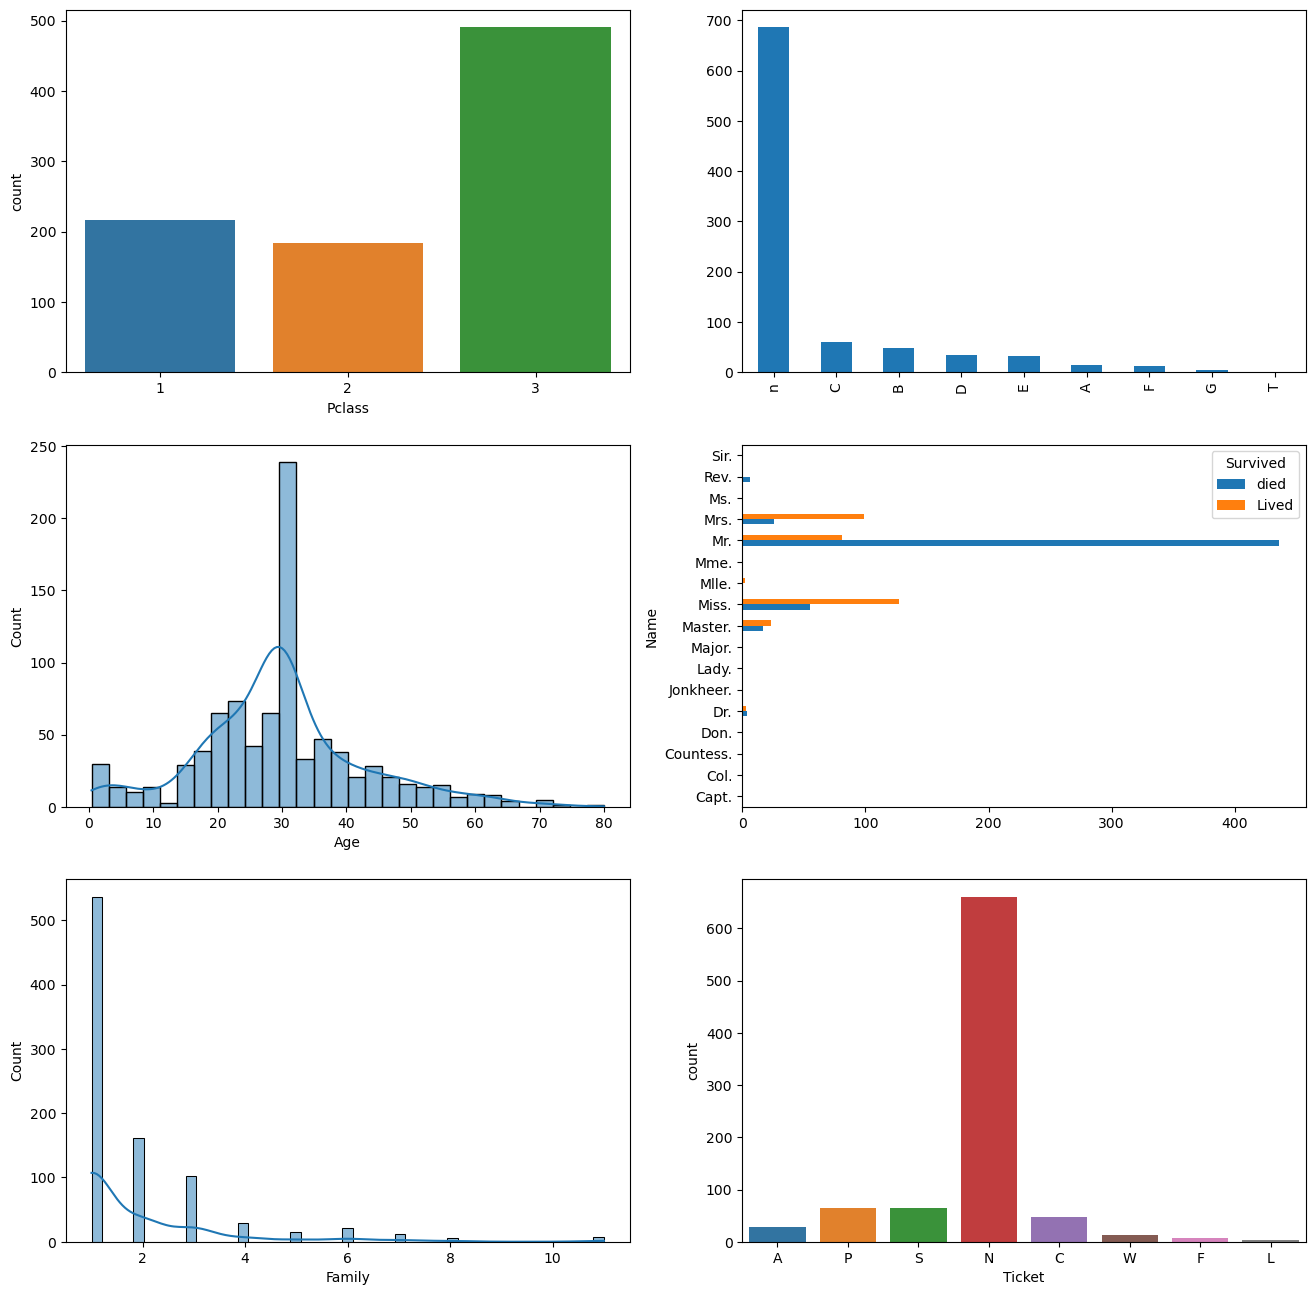

In [18]:
# Subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 16))

# pclass
sb.countplot(data=df, x="Pclass", ax=axes[0, 0])

# cabin col
df.Cabin.value_counts().sort_values(ascending=False).plot(kind='bar', ax=axes[0, 1])

# A histplot of age
sb.histplot(x=df.Age, ax=axes[1, 0], kde=True)

# Title: number of people that survived with respect to title 
title_sur = df.pivot_table(index='Name', columns='Survived', aggfunc='size', fill_value=0)

title_sur = title_sur.rename(columns={0: "died", 1:"Lived"})

title_sur.plot(kind='barh', ax=axes[1, 1])

# a boxplot of Family 
sb.histplot(x=df.Family, ax=axes[2, 0], kde=True)

# The ticket plot
sb.countplot(x=df.Ticket, ax=axes[2, 1])

plt.show()

* Now let's encode and pass it to an algorithm to see the level of accuracy we'll achieve

In [19]:
from sklearn.preprocessing import OneHotEncoder as OH, OrdinalEncoder as OE

# split the dataset into features and target

x = df.drop(columns=['Survived'])
y = df.Survived

# one hot encoder

oneHot = OH(handle_unknown='ignore', sparse=False)
# select low cardinality dtypes
one_hot = [a for a in x.select_dtypes(include='object') if x[a].nunique()<= 5]

# Encode the values
OneHotFeatures = oneHot.fit_transform(x[one_hot])

OneHotFeatures = pd.DataFrame(OneHotFeatures)


# ordinal encoder
ordinal = OE()

# select high cardinality dtypes
ord_features = [a for a in x.select_dtypes(include='object') if x[a].nunique() > 5 ] 


OrdinalFeatures = ordinal.fit_transform(x[ord_features])

# convert the encoded values into a data frame
OrdinalFeatures = pd.DataFrame(OrdinalFeatures)

# drop encoded columns
x.drop(columns=one_hot+ord_features, inplace=True)

# add encoders
# final_data = pd.concat([x, OneHotFeatures, OrdinalFeatures], axis=1)

final_data = x.join(OneHotFeatures).join(OrdinalFeatures, lsuffix='_ordinal')

In [20]:
# split the data
x_train = final_data.sample(frac=0.8)
y_train = y[x_train.index]
x_test = final_data.drop(index=x_train.index)
y_test = y[x_test.index]
x_test

,Pclass,Age,SibSp,Parch,Fare,Family,0_ordinal,1_ordinal,2_ordinal,3,4,5,0,1,2
3,1,35.0,1,0,53.1000,2,1.0,0.0,0.0,0.0,1.0,0.0,13.0,4.0,2.0
7,3,2.0,3,1,21.0750,5,0.0,1.0,0.0,0.0,1.0,0.0,8.0,4.0,8.0
25,3,38.0,1,5,31.3875,7,1.0,0.0,0.0,0.0,1.0,0.0,13.0,4.0,8.0
30,1,40.0,0,0,27.7208,1,0.0,1.0,1.0,0.0,0.0,0.0,3.0,5.0,8.0
57,3,28.5,0,0,7.2292,1,0.0,1.0,1.0,0.0,0.0,0.0,12.0,4.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,3,4.0,1,1,11.1333,3,0.0,1.0,0.0,0.0,1.0,0.0,8.0,4.0,8.0
878,3,29.7,0,0,7.8958,1,0.0,1.0,0.0,0.0,1.0,0.0,12.0,4.0,8.0
879,1,56.0,0,1,83.1583,2,1.0,0.0,1.0,0.0,0.0,0.0,13.0,4.0,2.0
880,2,25.0,0,1,26.0000,2,1.0,0.0,0.0,0.0,1.0,0.0,13.0,4.0,8.0


In [21]:
final_data.info()
# no missing values
y = pd.DataFrame(y)
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     891 non-null    int64  
 1   Age        891 non-null    float64
 2   SibSp      891 non-null    int64  
 3   Parch      891 non-null    int64  
 4   Fare       891 non-null    float64
 5   Family     891 non-null    int64  
 6   0_ordinal  891 non-null    float64
 7   1_ordinal  891 non-null    float64
 8   2_ordinal  891 non-null    float64
 9   3          891 non-null    float64
 10  4          891 non-null    float64
 11  5          891 non-null    float64
 12  0          891 non-null    float64
 13  1          891 non-null    float64
 14  2          891 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 104.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    ------

In [22]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score, mean_absolute_error as mae

# let's make a function to ease our lives
def run_model(Xtrain, ytrain, Xtest, ytest, model):
    # fit data into the model
    model.fit(Xtrain, ytrain)
    # make prediction
    prediction = model.predict(Xtest)
    # score dataset
    acc_score = accuracy_score(ytest, prediction)
    mean_abs = mae(ytest, prediction)
    return [acc_score, mean_abs]

In [37]:
# let's score the dataset and see just how accurate this is
accuracy, mean_error = run_model(x_train, y_train, x_test, y_test, DTC(max_leaf_nodes=50))
accuracy

c:\Users\King_Abdul\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

c:\Users\King_Abdul\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



0.8033707865168539

In [59]:
import plotly.express as px


In [56]:
x_axis = []
y_axis = []


for a in range(50, 1050, 50):
    accuracy, mean_error = run_model(x_train, y_train, x_test, y_test, DTC(max_leaf_nodes=a))
    x_axis.append(a)
    y_axis.append(accuracy)

trace = go.Scatter(x=x_axis, y=y_axis, mode='markers', marker_color=y_axis, marker={"showscale":True})

iplot([trace])

c:\Users\King_Abdul\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

c:\Users\King_Abdul\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

c:\Users\King_Abdul\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

c:\Users\King_Abdul\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

c:\Users\King_Abdul\anac

c:\Users\King_Abdul\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

c:\Users\King_Abdul\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

c:\Users\King_Abdul\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

c:\Users\King_Abdul\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

c:\Users\King_Abdul\anac

In [63]:

criteria = ['gini', 'entropy', 'log_loss']
x_axis = []
y_axis = []


for a in range(50, 1000, 50):
    acc, mean_error = run_model(x_train,
                                y_train,
                                x_test,
                                y_test,
                                RFC(n_estimators=a,
                                criterion=criteria[1]))
    x_axis.append(a)
    y_axis.append(acc)
    


c:\Users\King_Abdul\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



c:\Users\King_Abdul\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

c:\Users\King_Abdul\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

c:\Users\King_Abdul\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

c:\Users\King_Abdul\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

c:\Users\King_Abdul\anac

In [64]:
plot = go.Scatter(x=x_axis, y=y_axis, mode='markers', marker_color=y_axis, marker={'showscale':True})
iplot([plot])

In [71]:

px.scatter(x=x_axis, y=y_axis, color=y_axis, size=x_axis, opacity=.7)